### Library Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

from LSMPricing import lsm_pricer
from BinomialTreePricing import btree_pricer
from BSAnalyticalPricing import BSAnalytical
from MonteCarlo import simulate_gbm_paths

### AAPL Option Chain Data Import

In [2]:
currentdir = os.getcwd()
targetdir = currentdir + "\\aapl_eod_2019-ubqxfb"
files = os.listdir(targetdir)

data = pd.read_csv(targetdir + "\\"+files[0], sep=",", low_memory=False)
for i in range(1, len(files)):
    data = pd.concat([data, pd.read_csv(targetdir + "\\"+files[i], sep=",", low_memory=False)])
data.reset_index(inplace=True)

In [3]:
data.head()

,index,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
0,0,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,0.90886,...,0.01,-0.00034,0.00011,0.00079,-0.00509,-0.00041,1.625550,0.000000,57.9,0.367
1,1,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,1.00000,...,0.01,-0.00069,0.00010,0.00039,-0.00518,-0.00010,1.461900,200.000000,52.9,0.335
2,2,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,1.00000,...,0.04,-0.00066,0.00020,0.00000,-0.00425,-0.00009,1.305490,706.000000,47.9,0.303
3,3,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,1.00000,...,0.01,-0.00120,0.00021,0.00089,-0.00434,-0.00005,1.155130,0.000000,42.9,0.272
4,4,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,1.00000,...,0.01,-0.00109,0.00024,0.00045,-0.00429,-0.00020,1.010620,0.000000,37.9,0.240


In [4]:
data.columns

Index(['index', '[QUOTE_UNIXTIME]', ' [QUOTE_READTIME]', ' [QUOTE_DATE]',
       ' [QUOTE_TIME_HOURS]', ' [UNDERLYING_LAST]', ' [EXPIRE_DATE]',
       ' [EXPIRE_UNIX]', ' [DTE]', ' [C_DELTA]', ' [C_GAMMA]', ' [C_VEGA]',
       ' [C_THETA]', ' [C_RHO]', ' [C_IV]', ' [C_VOLUME]', ' [C_LAST]',
       ' [C_SIZE]', ' [C_BID]', ' [C_ASK]', ' [STRIKE]', ' [P_BID]',
       ' [P_ASK]', ' [P_SIZE]', ' [P_LAST]', ' [P_DELTA]', ' [P_GAMMA]',
       ' [P_VEGA]', ' [P_THETA]', ' [P_RHO]', ' [P_IV]', ' [P_VOLUME]',
       ' [STRIKE_DISTANCE]', ' [STRIKE_DISTANCE_PCT]'],
      dtype='object')

In [5]:
first_day_options = data[data[" [QUOTE_DATE]"] == " 2019-01-02"]
# np.unique(first_day_options[' [EXPIRE_DATE]'])
# first_day_1y_options = first_day_options[first_day_options[" [EXPIRE_DATE]"] == ' 2020-01-17']
first_day_3m_options = first_day_options[first_day_options[" [EXPIRE_DATE]"] == ' 2019-03-15']
first_day_3m_options[first_day_options[" [STRIKE]"] == 130][" [P_IV]"]

C:\Users\sidiy\AppData\Local\Temp/ipykernel_15600/3258823540.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  first_day_3m_options[first_day_options[" [STRIKE]"] == 130][" [P_IV]"]


432     0.409460
Name:  [P_IV], dtype: object

In [49]:
# first_day_3m_options[[" [STRIKE_DISTANCE]", " [STRIKE]", " [C_ASK]", " [P_ASK]", " [P_IV]", " [C_IV]"]]

In [ ]:
# 665    130.0
# 666    135.0
# 667    140.0
# 668    145.0
# 669    150.0
# 670    155.0
# 671    160.0
# 672    165.0
# 673    170.0
# 674    175.0

### Get AAPL Stock Data

In [19]:
start_date="2018-01-01"
end_date="2019-01-01"
time_interval="daily"

aapl = YahooFinancials("AAPL")
aapl = aapl.get_historical_price_data(start_date=start_date, end_date=end_date, time_interval=time_interval)
aapl = pd.DataFrame(aapl["AAPL"]['prices'])
aapl = aapl.drop('date', axis=1).set_index('formatted_date')
aapl.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600,40.950500
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600,40.943359
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400,41.133537
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000,41.601860
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200,41.447346


### Set Params

In [51]:
sig = np.std(aapl["adjclose"].pct_change()[1:])*np.sqrt(len(aapl))
nsims = 10000
S0 = 157.92
T = .25
discrete_freq = 252
OP_TYPE = "put"
K = 155.0
r = .016
POLY_DEGREE = 5

In [52]:
sig

0.28628315968847334

In [53]:
actual = []
for i in range(130, 180, 5):
    actual_data_op = first_day_3m_options[first_day_3m_options[" [STRIKE]"] == i]
    actual_call = (float(actual_data_op[' [C_BID]']) + float(actual_data_op[' [C_ASK]']))/2
    actual_put = (float(actual_data_op[' [P_BID]']) + float(actual_data_op[' [P_ASK]']))/2
    actual.append((actual_put, actual_call))
    print("Actual American Put (", str(i), "):", actual_put)
    print("Actual American call (", str(i), "):", actual_call)

Actual American Put ( 130 ): 2.005
Actual American call ( 130 ): 29.375
Actual American Put ( 135 ): 2.745
Actual American call ( 135 ): 25.675
Actual American Put ( 140 ): 3.6950000000000003
Actual American call ( 140 ): 21.655
Actual American Put ( 145 ): 4.970000000000001
Actual American call ( 145 ): 18.02
Actual American Put ( 150 ): 6.605
Actual American call ( 150 ): 14.45
Actual American Put ( 155 ): 8.55
Actual American call ( 155 ): 11.504999999999999
Actual American Put ( 160 ): 10.915
Actual American call ( 160 ): 8.850000000000001
Actual American Put ( 165 ): 13.7
Actual American call ( 165 ): 6.65
Actual American Put ( 170 ): 16.93
Actual American call ( 170 ): 4.845000000000001
Actual American Put ( 175 ): 20.549999999999997
Actual American call ( 175 ): 3.4000000000000004


### Pricing American Options (AAPL) using LSM Monte Carlo

In [54]:
lsm = []
for i in range(130, 180, 5):
    put_price = lsm_pricer("ap", nsims, S0, i, r, sig, T, discrete_freq, POLY_DEGREE)
    call_price = lsm_pricer("ac", nsims, S0, i, r, sig, T, discrete_freq, POLY_DEGREE)
    lsm.append((put_price, call_price))
    print("LSM MC American Put ",str(i),"): ", put_price)
    print("LSM MC American call ",str(i), "):", call_price)

LSM MC American Put  130 ):  0.7329680282868255
LSM MC American call  130 ): 29.2549764256983
LSM MC American Put  135 ):  1.2292453986167395
LSM MC American call  135 ): 24.815619330370648
LSM MC American Put  140 ):  2.1181115681966802
LSM MC American call  140 ): 20.357410682559067
LSM MC American Put  145 ):  3.2893122450385186
LSM MC American call  145 ): 16.5508894068823
LSM MC American Put  150 ):  5.078371312602774
LSM MC American call  150 ): 13.484968079756445
LSM MC American Put  155 ):  7.0921112330569125
LSM MC American call  155 ): 10.645335704541372
LSM MC American Put  160 ):  9.724487023143281
LSM MC American call  160 ): 8.298041972051546
LSM MC American Put  165 ):  12.7241279431281
LSM MC American call  165 ): 5.966386744633851
LSM MC American Put  170 ):  16.08329841246443
LSM MC American call  170 ): 4.839336072513305
LSM MC American Put  175 ):  20.003089939542633
LSM MC American call  175 ): 3.2740447058966806


### Pricing American Options (AAPL) using BT

In [55]:
bt = []
for i in range(130, 180, 5):
    # Without control variates
    put_price = btree_pricer(S0, i, sig, r, T, 1000, "ap")
    call_price = btree_pricer(S0, i, sig, r, T, 1000, "ac")
    bt.append((put_price, call_price))
    print("BT American Put (",str(i),"):", put_price)
    print("BT American call (",str(i), "):", call_price)

BT American Put ( 130 ): 0.7728291559360388
BT American call ( 130 ): 29.209567790849206
BT American Put ( 135 ): 1.3700204602893729
BT American call ( 135 ): 24.82470576491413
BT American Put ( 140 ): 2.2633055672546574
BT American call ( 140 ): 20.734550776528117
BT American Put ( 145 ): 3.5166312082972744
BT American call ( 145 ): 17.002416127277225
BT American Put ( 150 ): 5.178014490757213
BT American call ( 150 ): 13.675531376979297
BT American Put ( 155 ): 7.277187686528576
BT American call ( 155 ): 10.783285202882
BT American Put ( 160 ): 9.843469324465044
BT American call ( 160 ): 8.354432952019847
BT American Put ( 165 ): 12.83431059749362
BT American call ( 165 ): 6.344364127966241
BT American Put ( 170 ): 16.211163299160063
BT American call ( 170 ): 4.713416644741785
BT American Put ( 175 ): 19.963065458306037
BT American call ( 175 ): 3.4533091036828694


In [40]:
pd.DataFrame(np.hstack([np.array(actual), np.array(lsm), np.array(bt)])).to_csv("actual vs computed.csv")

# Charts

##### Error vs Num. Simulations Graph (MC)

In [56]:
call_fnsims = []
for i in range(1000, 100000, 4000):
    # put_price = lsm_pricer("ap", i, S0, K, r, sig, T, discrete_freq, POLY_DEGREE)
    call_price = lsm_pricer("ac", i, S0, K, r, sig, T, discrete_freq, POLY_DEGREE)
    call_fnsims.append(call_price)

In [57]:
put_fnsims = []
for i in range(1000, 100000, 4000):
    put_price = lsm_pricer("ap", i, S0, K, r, sig, T, discrete_freq, POLY_DEGREE)
    # put_price = lsm_pricer("ac", i, S0, K, r, sig, T, discrete_freq, POLY_DEGREE)
    put_fnsims.append(put_price)

Text(0.5, 1.0, 'Error vs Num. Simulations (1k to 100k) - LSM Call')

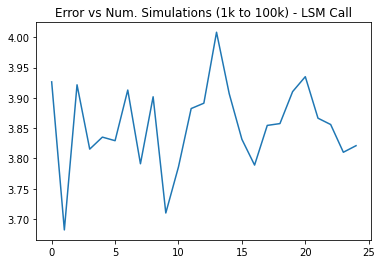

In [60]:
plt.plot(14.45 - np.array(call_fnsims))
plt.title("Error vs Num. Simulations (1k to 100k) - LSM Call")

Text(0.5, 1.0, 'Error vs Num. Simulations (1k to 100k) - LSM Put')

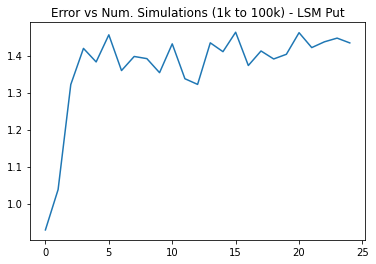

In [61]:
plt.plot(8.55 - np.array(put_fnsims))
plt.title("Error vs Num. Simulations (1k to 100k) - LSM Put")

##### Error vs Num. Trees Graph (MC)

In [101]:
call_fntree = []
for i in range(3, 1000, 10):
    # put_price = lsm_pricer("ap", i, S0, K, r, sig, T, discrete_freq, POLY_DEGREE)
    call_price = btree_pricer(S0, K, sig, r, T, i, "ac")
    call_fntree.append(call_price)

In [105]:
put_fntree = []
for i in range(3, 1000, 10):
    # put_price = lsm_pricer("ap", i, S0, K, r, sig, T, discrete_freq, POLY_DEGREE)
    put_price = btree_pricer(S0, K, sig, r, T, i, "ap")
    put_fntree.append(put_price)

Text(0.5, 1.0, 'Error vs Num. Steps (3 to 1000) - BT Call')

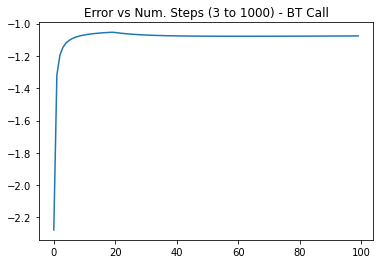

In [102]:
plt.plot(actual_call - np.array(call_fntree))
plt.title("Error vs Num. Steps (3 to 1000) - BT Call")

Text(0.5, 1.0, 'Error vs Num. Steps (3 to 1000) - BT Put')

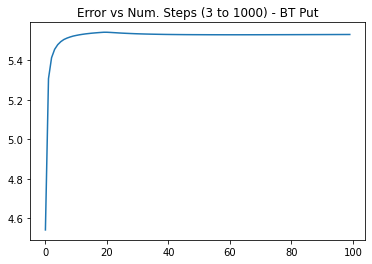

In [106]:
plt.plot(actual_put - np.array(put_fntree))
plt.title("Error vs Num. Steps (3 to 1000) - BT Put")